#### STEP #1 : PROBLEM STATEMENT AND BUSINESS CASE

#### STEP #2: IMPORT THE LIBRARIES AND IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

#### STEP #3 : VISUALIZATION OF THE DATASET

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
training = np.array(fashion_train_df, dtype = 'float32')

In [9]:
testing = np.array(fashion_test_df, dtype = 'float32')

1.0

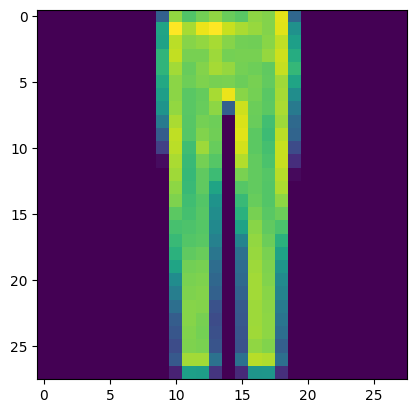

In [10]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

In [11]:
###

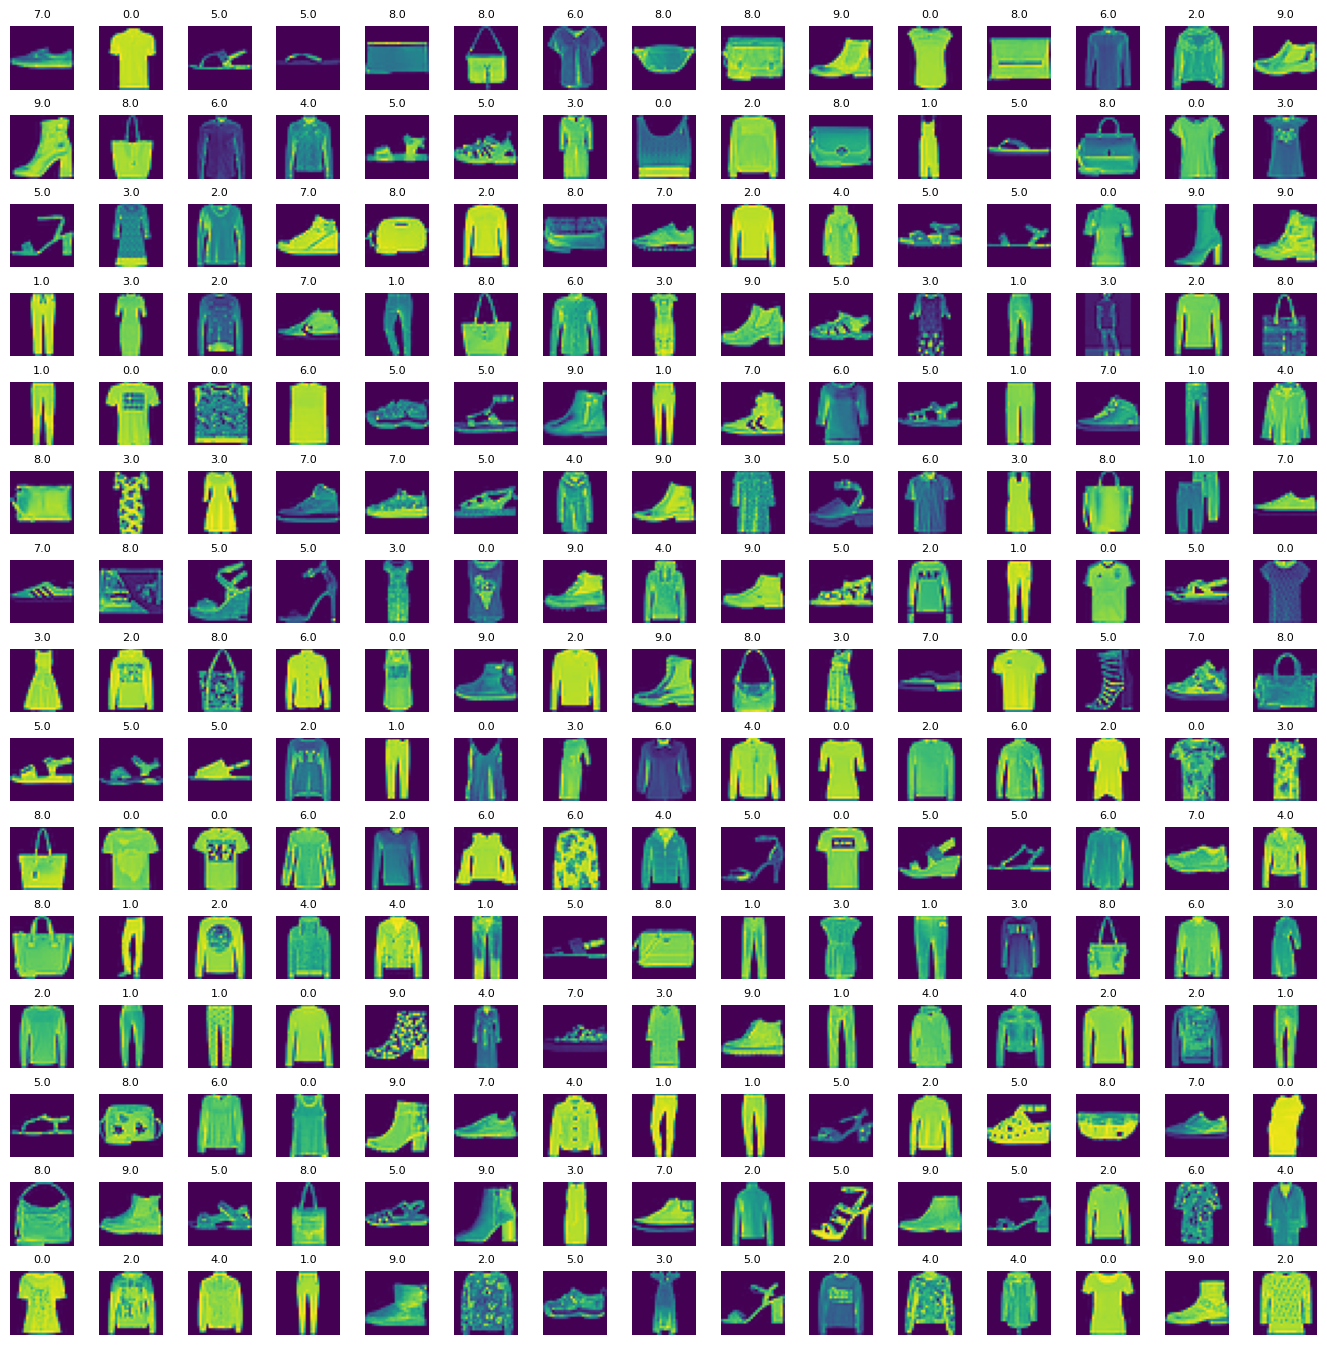

In [12]:
# Viewing all the images in the form of a grid

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid, figsize = (17,17))
axes = axes.ravel()

n_training = len(training)

for i in np.arange(W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

    plt.subplots_adjust(hspace=0.4)

#### STEP #4 : TRAINING THE MODEL

In [13]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [14]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train, test_size= 0.2,random_state= 12345)

In [17]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [18]:
X_train.shape

(48000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_validate.shape

(12000, 28, 28, 1)

In [21]:
import sys, platform
print("Python:", sys.version)
print("Platform:", platform.platform())

Python: 3.11.14 (main, Oct 21 2025, 18:27:30) [Clang 20.1.8 ]
Platform: macOS-15.0.1-arm64-arm-64bit


In [22]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.16.2


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()

In [25]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation= 'relu'))

/opt/homebrew/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-19 22:24:48.807551: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2026-01-19 22:24:48.807821: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2026-01-19 22:24:48.807840: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2026-01-19 22:24:48.807925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-19 22:24:48.807957: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fa

In [26]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [27]:
cnn_model.add(Flatten())

In [28]:
cnn_model.add(Dense(32, activation='relu'))

In [29]:
cnn_model.add(Dense(10, activation='sigmoid'))

In [30]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [31]:
cnn_model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size=512,
    verbose= 1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/50


2026-01-19 22:25:06.967613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5403 - loss: 1.4090 - val_accuracy: 0.7078 - val_loss: 0.8005
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7393 - loss: 0.7084 - val_accuracy: 0.7624 - val_loss: 0.6473
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7758 - loss: 0.6116 - val_accuracy: 0.7883 - val_loss: 0.5837
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7922 - loss: 0.5604 - val_accuracy: 0.8002 - val_loss: 0.5437
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8044 - loss: 0.5273 - val_accuracy: 0.8073 - val_loss: 0.5187
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8129 - loss: 0.5051 - val_accuracy: 0.8183 - val_loss: 0.4962
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8223 - loss: 0.4854 - val_accuracy: 0.8278 - val_loss: 0.4787
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8275 - loss: 0.4708 - val_accuracy: 0.8292 - val_loss: 0.4719
Ep

#### STEP #5 : EVALUATING THE MODEL

In [33]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.37662237882614136
Test accuracy: 0.8597999811172485


In [39]:
cnn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.99999285e-01, 1.57173604e-01, 9.99189079e-01, ...,
        9.69312824e-12, 9.81520355e-01, 3.05631538e-08],
       [5.42883337e-01, 1.00000000e+00, 3.46118845e-02, ...,
        9.18955493e-07, 4.83268686e-02, 3.07591813e-06],
       [9.94644642e-01, 1.17056854e-02, 9.99081850e-01, ...,
        1.11848692e-07, 2.56526887e-01, 1.17783005e-04],
       ...,
       [3.56897060e-03, 1.42782272e-04, 9.06713605e-02, ...,
        2.39529926e-03, 9.99295235e-01, 3.25435190e-04],
       [9.98869240e-01, 8.51846416e-04, 9.93277371e-01, ...,
        1.25941188e-10, 9.99882340e-01, 1.63637174e-04],
       [6.14334881e-01, 9.99837637e-01, 9.37113166e-01, ...,
        5.13705745e-11, 4.71115768e-01, 5.48623852e-04]], dtype=float32)

In [40]:

y_prob = cnn_model.predict(X_test)
predicted_classes = np.argmax(y_prob, axis=1)  # now 1D labels

print(predicted_classes[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0 1 6 6 3 6 8 6 5 0]


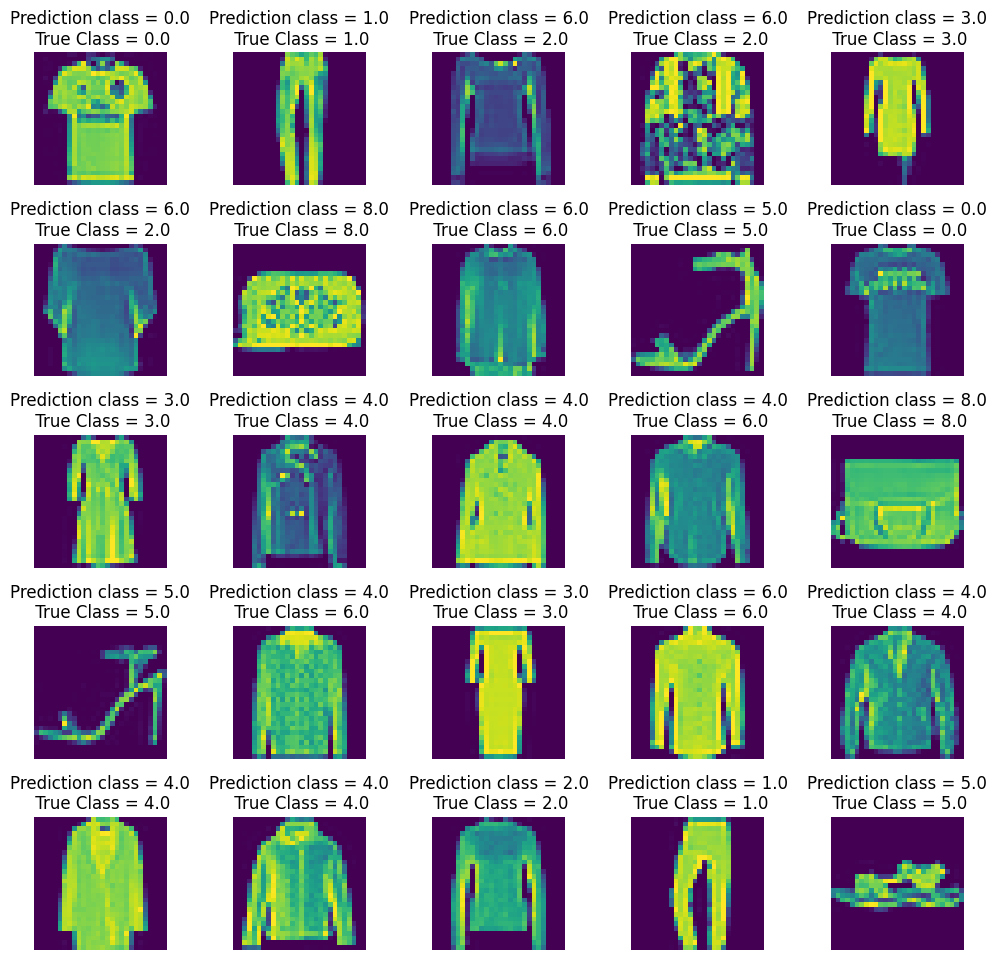

In [41]:
W = 5
L = 5

fig, axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

n_training = len(training)

for i in np.arange(W * L):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction class = {:0.1f}\n True Class = {:0.1f}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[830   3  20  28   3   2 102   0  12   0]
 [  2 973   2  18   0   2   3   0   0   0]
 [ 10   2 738   6 137   0 102   0   5   0]
 [ 25  22  12 853  43   1  43   0   1   0]
 [  2   0  51  19 829   0  97   0   2   0]
 [  0   0   0   1   0 951   0  31   2  15]
 [155   4  89  21 120   0 598   0  13   0]
 [  0   0   0   0   0  42   0 902   0  56]
 [  3   2   5   2   5   4   9   1 965   4]
 [  0   0   0   0   0   9   0  31   1 959]]


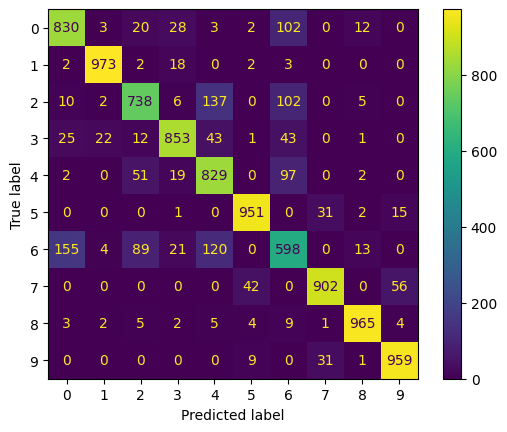

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Get predicted class labels
y_prob = cnn_model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

# 2) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 3) Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [43]:
from sklearn.metrics import classification_report

y_prob = cnn_model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      1000
         1.0       0.97      0.97      0.97      1000
         2.0       0.80      0.74      0.77      1000
         3.0       0.90      0.85      0.88      1000
         4.0       0.73      0.83      0.78      1000
         5.0       0.94      0.95      0.95      1000
         6.0       0.63      0.60      0.61      1000
         7.0       0.93      0.90      0.92      1000
         8.0       0.96      0.96      0.96      1000
         9.0       0.93      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [44]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.83      0.82      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.80      0.74      0.77      1000
       Dress       0.90      0.85      0.88      1000
        Coat       0.73      0.83      0.78      1000
      Sandal       0.94      0.95      0.95      1000
       Shirt       0.63      0.60      0.61      1000
     Sneaker       0.93      0.90      0.92      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.93      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

